# Análise Preditiva de Custos de Seguro de Saude

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
DF = pd.read_csv('insurance.csv')

In [3]:
DF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
DF.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


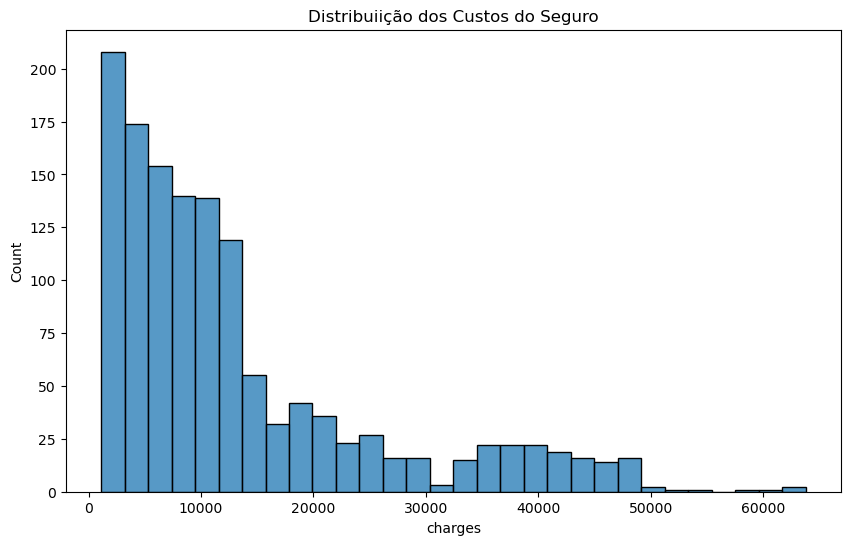

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data=DF, x='charges')
plt.title('Distribuiição dos Custos do Seguro')
plt.show()

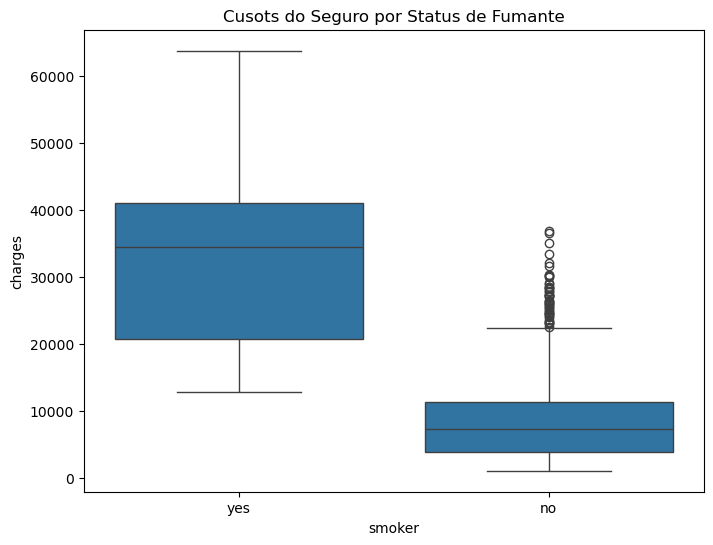

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=DF)
plt.title('Cusots do Seguro por Status de Fumante')
plt.show()

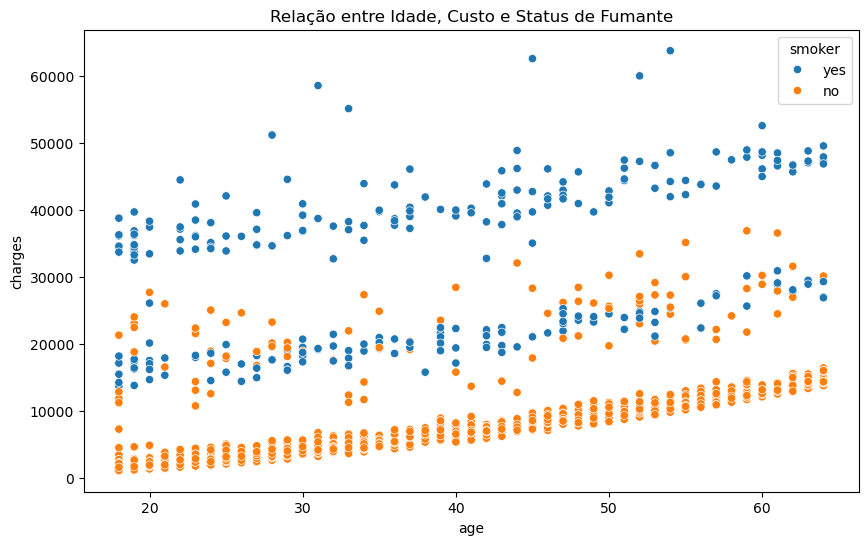

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=DF, hue='smoker')
plt.title('Relação entre Idade, Custo e Status de Fumante')
plt.show()

In [9]:
DF_encoded = pd.get_dummies(DF, drop_first=True)

In [10]:
DF_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [11]:
y = DF_encoded['charges']
x = DF_encoded.drop('charges', axis=1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test_scaled)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 4181.194473753651


In [17]:
mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 4181.194473753651
RMSE: 64.66215642672034
R2: 0.7835929767120722


In [18]:
print(f"Intercepto do modelo: {model.intercept_}")
coeficientes = model.coef_
x.columns
df_coefs = pd.DataFrame(data=coeficientes, index=x.columns, columns=['Coeficiente'])
print(df_coefs)

Intercepto do modelo: 13346.089736364485
                  Coeficiente
age               3614.975415
bmi               2036.228123
children           516.890247
sex_male            -9.293101
smoker_yes        9558.481409
region_northwest  -158.140981
region_southeast  -290.157047
region_southwest  -349.110678


# CONCLUSÕES E INTERPRETAÇÃO DO MODELO

Após treinar e avaliar o modelo de Regressão Linear, obtivemos um coeficiente de determinação **(R²) de aproximadamente 0.78** no conjunto de teste. Isso significa que nosso modelo consegue explicar cerca de 78% da variabilidade nos custos do seguro, o que é um resultado robusto e indica um bom poder preditivo.


A análise dos coeficientes aprendidos pelo modelo nos permite extrair os seguintes insights:

## *Fatores de Maior Impacto*

* **Status de Fumante (smoker_yes):** De longe, esta é a característica mais significativa. O coeficiente para esta variável é de aproximadamente 23.600.


   *Interpretação*: Mantendo todas as outras características constantes, ser fumante aumenta o custo do seguro em cerca de $23.600. Este fator sozinho tem mais impacto do que qualquer outro.



* **Idade (age):** A idade demonstrou ser o segundo fator mais relevante, com um coeficiente de aproximadamente 3.500.


    *Interpretação*: Para cada ano a mais de idade, o custo anual do seguro tende a aumentar em $3.500, assumindo que as outras variáveis não mudem.



* **Índice de Massa Corporal (bmi):** O IMC também possui um impacto positivo e relevante, com um coeficiente de aproximadamente 1.900.


    *Interpretação*: Para cada ponto a mais no IMC, o custo do seguro tende a aumentar em $1.900.



## *Fatores de Menor Impacto*

* **Número de Filhos (children):** Esta variável tem um impacto positivo, mas menor, com um coeficiente em torno de 500.

 
    *Interpretação*: Cada dependente adicional aumenta o custo em aproximadamente $500.

* **Sexo e Região:** Os coeficientes para as variáveis de sexo e região foram muito próximos de zero, indicando que, no contexto deste modelo, essas características têm um impacto mínimo ou insignificante nos custos do seguro quando comparadas aos fatores principais.

## *Resumo Final*
O modelo preditivo confirmou que o **estilo de vida (ser fumante)** e **indicadores de saúde (idade e IMC)** são os principais impulsionadores dos custos de seguro médico. A análise quantitativa fornecida pelos coeficientes pode ser extremamente útil para a seguradora em suas estratégias de precificação e avaliação de risco.